# Bonus

🎯 You are a Data Scientist for a bank. You are asked to develop a model that is able to detect at least 90% of fraudlent transactions. Go!

👇 Load the player `creditcard.csv` dataset and display its first 5 rows.

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

In [2]:
data = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_creditcard_fraud.csv")

data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-6.677212,5.529299,-7.193275,6.081321,-1.636071,0.500610,-4.640770,-4.339840,-0.950036,0.566680,...,5.563301,-1.608272,0.965322,0.163718,0.047531,0.466165,0.278547,1.471988,105.89,1
1,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
2,-4.446847,-0.014793,-5.126307,6.945130,5.269255,-4.297177,-2.591242,0.342671,-3.880663,-3.976525,...,0.247913,-0.049586,-0.226017,-0.401236,0.856124,0.661272,0.492560,0.971834,1.00,1
3,-1.309441,1.786495,-1.371070,1.214335,-0.336642,-1.390120,-1.709109,0.667748,-1.699809,-3.843911,...,0.533521,-0.022180,-0.299556,-0.226416,0.364360,-0.475102,0.571426,0.293426,1.00,1
4,0.206075,1.387360,-1.045287,4.228686,-1.647549,-0.180897,-2.943678,0.859156,-1.181743,-3.096504,...,0.469199,0.344930,-0.203799,0.376640,0.715485,0.226003,0.628545,0.319918,0.76,1


In [8]:
data.describe().applymap("{0:.2f}".format)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,28481.00,28481.00,28481.00,28481.00,28481.00,28481.00,28481.00,28481.00,28481.00,28481.00,...,28481.00,28481.00,28481.00,28481.00,28481.00,28481.00,28481.00,28481.00,28481.00,28481.00
mean,-0.01,0.01,0.01,0.00,0.00,-0.01,-0.01,-0.00,0.00,0.00,...,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,86.30,0.00
std,1.94,1.62,1.48,1.41,1.36,1.32,1.20,1.20,1.10,1.09,...,0.72,0.72,0.61,0.61,0.52,0.48,0.39,0.29,232.23,0.04
min,-41.93,-50.38,-24.20,-5.05,-42.15,-16.17,-21.93,-50.94,-7.08,-16.75,...,-22.67,-5.62,-26.43,-2.78,-4.56,-1.60,-8.88,-9.62,0.00,0.00
25%,-0.93,-0.60,-0.88,-0.85,-0.69,-0.77,-0.56,-0.21,-0.64,-0.54,...,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.74,0.00
50%,0.01,0.08,0.18,-0.02,-0.06,-0.28,0.03,0.02,-0.05,-0.10,...,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,1.31,0.81,1.02,0.76,0.63,0.39,0.56,0.33,0.60,0.45,...,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.00,0.00
max,2.42,12.93,4.19,11.84,24.36,22.53,36.68,14.54,9.23,12.91,...,19.31,7.22,22.53,3.70,4.83,3.07,11.14,8.44,8182.70,1.00


ℹ️ Due to confidentiality issues, the original features have been preprocessed and renamed `V1` to `V28`. There is only one features which has not been transformed, `Amount` which is the transaction Amount. `Class` is the target and it takes value 1 in case of fraud and 0 otherwise.

In [5]:
data.Class.value_counts(normalize=True)

0    0.99828
1    0.00172
Name: Class, dtype: float64

## Check for outliers and distribution

In [10]:
import seaborn as sns

In [14]:
len(data.columns)

30

In [ ]:
fig, ax = plt.subplots(2, 2)

ax[0, 0].plot(range(10), 'r') #row=0, col=0
ax[1, 0].plot(range(10), 'b') #row=1, col=0
ax[0, 1].plot(range(10), 'g') #row=0, col=1
ax[1, 1].plot(range(10), 'k') #row=1, col=1
plt.show()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


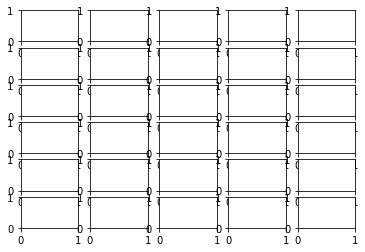

In [21]:
fig, ax = plt.subplots(6 ,5)
for i in range (len(data.columns)): 
    plt.subplots()

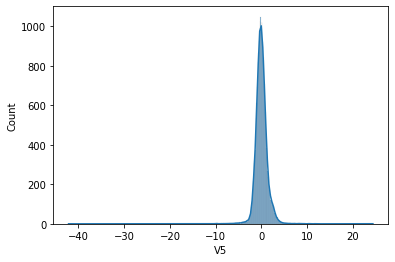

In [19]:
sns.histplot(data.V5, kde = True); 

## Robust Scaling

In [24]:
X = data.drop(columns = "Class")
y = data.Class

In [26]:
scaler = RobustScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [29]:
X_scaled = pd.DataFrame(X_scaled, columns= X.columns)

## Base Estimation: Logistic Regression

In [31]:
log_model = LogisticRegression(max_iter=1000, class_weight="balanced")

In [ ]:
cv_results = cross_validate(log_model, X_scaled, y, cv = 5, )